In [2]:
DATA_PATH = "gender_dataset/"

In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [4]:
train_datagen = ImageDataGenerator( # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
    rescale = 1./255,
    rotation_range=5,
    shear_range = 0.1, 
    zoom_range = 0.1,
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(
   rescale = 1./255 
)

In [5]:
train_data = train_datagen.flow_from_directory(
  DATA_PATH+'Training/',
  target_size = (224, 224),
  color_mode = 'rgb',
  classes = ['females', 'males', 'unknown'],
  class_mode = 'categorical',
  batch_size = 40,
  shuffle = True
)

test_data = test_datagen.flow_from_directory(
  DATA_PATH+'Validation/',
  target_size = (224, 224),
  color_mode = 'rgb',
  classes = ['females', 'males', 'unknown'],
  class_mode = 'categorical',
  batch_size = 40,
)

Found 11995 images belonging to 3 classes.
Found 2992 images belonging to 3 classes.


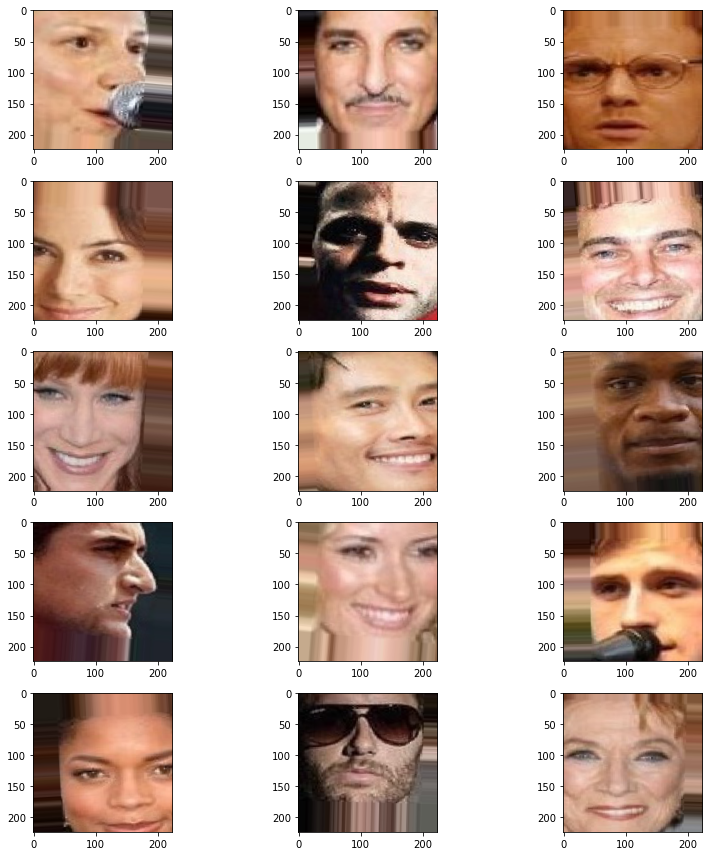

In [6]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5, 3, 1+i)
  for X_batch, Y_batch in train_data:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [7]:
model1 = Sequential()

model1.add(Conv2D(64, kernel_size=(3,3),  input_shape=(224,224,3),
                  activation='relu')) #64 neurons with 3x3 filter
#this class allows create CNN to extract feature
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Conv2D(32, activation='relu', kernel_size=(3,3)))
model1.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))


model1.add(Conv2D(32, activation='relu', kernel_size=(3,3))) 
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Conv2D(128, activation='relu', kernel_size=(3,3))) 
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Conv2D(64, activation='relu', kernel_size=(3,3))) 
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dense(3, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [8]:
# Model Callback - Stop the training when no learning is taking place
early_stop = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [early_stop]

In [9]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
history = model1.fit(
    train_data,
    # Number of batches for training
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    # Number of batches for testing
    validation_steps = len(test_data),
    epochs = 8,
    callbacks = callbacks_list,
)

Epoch 1/8
300/300 [==============================] - 567s 2s/step - loss: 0.7227 - accuracy: 0.5772 - val_loss: 0.5814 - val_accuracy: 0.6982
Epoch 2/8
300/300 [==============================] - 556s 2s/step - loss: 0.5101 - accuracy: 0.7627 - val_loss: 0.3638 - val_accuracy: 0.8576
Epoch 3/8
300/300 [==============================] - 522s 2s/step - loss: 0.3607 - accuracy: 0.8494 - val_loss: 0.2362 - val_accuracy: 0.9124
Epoch 4/8
300/300 [==============================] - 565s 2s/step - loss: 0.2722 - accuracy: 0.8949 - val_loss: 0.1810 - val_accuracy: 0.9355
Epoch 5/8
300/300 [==============================] - 565s 2s/step - loss: 0.2377 - accuracy: 0.9097 - val_loss: 0.2018 - val_accuracy: 0.9275
Epoch 6/8
300/300 [==============================] - 553s 2s/step - loss: 0.2246 - accuracy: 0.9136 - val_loss: 0.1815 - val_accuracy: 0.9368
Epoch 7/8
300/300 [==============================] - 518s 2s/step - loss: 0.1974 - accuracy: 0.9266 - val_loss: 0.1645 - val_accuracy: 0.9348
Epoch 

In [11]:
model1.save('gender_model.h5')

In [12]:
print("[INFO] accuracies....")  
# Train accuracy
scores = model1.evaluate(train_data, steps=len(train_data), verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))

# Test accuracy
scores = model1.evaluate(test_data, steps=len(test_data), verbose=1)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

[INFO] accuracies....
300/300 [==============================] - 151s 503ms/step - loss: 0.1956 - accuracy: 0.9206
Train Accuracy: 92.06%
75/75 [==============================] - 21s 286ms/step - loss: 0.1568 - accuracy: 0.9418
Test Accuracy: 94.18%


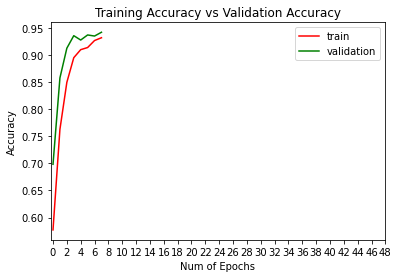

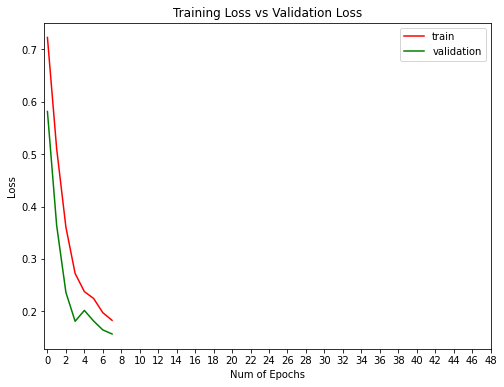

In [13]:
import numpy as np
plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, 50, 2))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0,50, 2))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

[INFO] evaluating the model...
              precision    recall  f1-score   support

     females       0.49      0.48      0.48      1464
       males       0.48      0.50      0.49      1464
     unknown       0.04      0.05      0.05        64

    accuracy                           0.48      2992
   macro avg       0.34      0.34      0.34      2992
weighted avg       0.48      0.48      0.48      2992



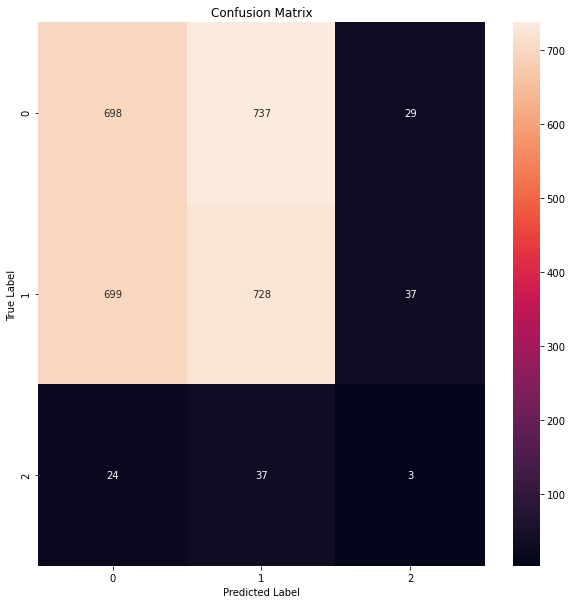

In [14]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
%matplotlib inline

# Reset the validation generator and evaluate the network after fine-tuning just the network head
print("[INFO] evaluating the model...")
test_data.reset()
plt.figure(figsize=(10,10))
predIdxs = model1.predict(test_data, steps = len(test_data))
predIdxs = np.argmax(predIdxs, axis=1)
matrix = confusion_matrix(test_data.classes, predIdxs)
sns.heatmap(matrix, annot=True, cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print(classification_report(test_data.classes, predIdxs, target_names=test_data.class_indices.keys()))

In [145]:
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2

img_path = 'gender_dataset/jur.jpg'

#img_path = mpimg.imread(14838)
#plt.imshow(img_path)
#plt.show()


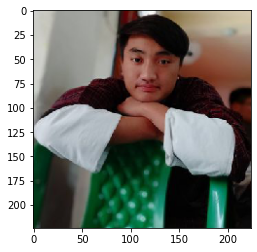

In [146]:
img = image.load_img(img_path, target_size=(224,224,3))
plt.imshow(img)

In [147]:
img = image.img_to_array(img)
img = img/225.0
img = img.reshape(1,224,224,3)
img.shape

(1, 224, 224, 3)

In [148]:
pred = model1.predict(img)

In [149]:
train_data.class_indices

{'females': 0, 'males': 1, 'unknown': 2}

In [150]:
dic = {0 : 'females', 1 : 'males', 2 : 'unknown'}
list_index = [0, 1, 2]
x = pred

for i in range(3):
    for j in range(3):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i] 
            list_index[i] = list_index[j]
            list_index[j] = temp

print(list_index)

[2, 1, 0]


In [151]:
for i in range(1):
    print(dic[list_index[i]], round(pred[0][list_index[i]]*100, 2),'%')

unknown 99.98 %
